<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/INFORME_CU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informe Provincial Cuenca
##Descarga y limpeza de datos

Comenzamos cargando los datos de la carpeta de Google Drive en la que estén guardados (será necesario cambiar esta ruta en función de la ruta del ordenador).

Es necesario aceptar la conexión con la cuenta de Google Drive.

Importante y esencial, antes de tirar el código es necesario que la carpeta de Drive a la que se va a llamar tenga los archivos en formato xlsx así nombrados: 'CU_SAAF.xlsx', 'CU_AT.xlsx', 'CU_EMPLEO.xlsx', 'CU_LOG.xlsx' para que no haya errores a la hora de ejecutar este código.

**¡OJO! Primeros archivo con extensión xlsx y los de las zonas a clasificar, con extensión csv, en teoría, los csv no deberían modificarse (a menos que las normativas cambien y con ello las zonas de impacto se modifiquen).**

**Y todos las columnas deben tener los nombres definidos en el documento "Resumen de datos por servicio FASPAS" y en mayúsculas antes de ser subidos al programa.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: The domain policy has disabled Drive File Stream: https://support.google.com/a/answer/7496409

Se importan las librerías necesarias para la parte de carga de datos y su limpieza.

In [1]:
pip install unidecode

In [64]:
import os
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt

In [ ]:
# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path = '/content/drive/My Drive/PFG_FASPAS/CU'
docs_xlsx = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
print(docs_xlsx)

# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path_csv = '/content/drive/My Drive/PFG_FASPAS/Zonas_Prioritarias'
docs_csv = [f for f in os.listdir(folder_path_csv) if f.endswith('.csv')]
print(docs_csv)

['CU_SAAF.xlsx', 'CU_AT.xlsx', 'CU_EMPLEO.xlsx', 'CU_LOG.xlsx']
['municipios_prioritarios_clm.csv']


Creación de un diccionario que almacene los dataframes (.xlsx) contenidos en la carpeta de Cuenca.

Se irán cargando todos los archivos en un dataframe que se añade al diccionario con el nombre de dicho archivo como clave.

In [ ]:
dic_dataframes = {}
dic_zonas = {}

for doc in docs_xlsx:
    entire_path = os.path.join(folder_path, doc)
    df = pd.read_excel(entire_path)
    # Uso el nombre del archivo como clave
    dic_dataframes[doc] = df

for doc in docs_csv:
  entire_path = os.path.join(folder_path_csv, doc)
  df = pd.read_csv(entire_path)
  # Uso el nombre del archivo como clave
  dic_zonas[doc] = df

A continuación se debe observar que el dataframe cuente con al menos las columnas: 'AÑOS ATENCIÓN', 'FECHA NACIMIENTO' **en formato fecha**, 'LOCALIDAD', 'GÉNERO' y 'CP'

Ahora que sabemos cuáles son las claves, guardamos cada dataframe por separado para trabajar con todos ellos de manera individual, por el momento.

In [ ]:
# Imprimir todas las claves
for clave in dic_dataframes.keys():
    print(clave)

CU_SAAF.xlsx
CU_AT.xlsx
CU_EMPLEO.xlsx
CU_LOG.xlsx


In [131]:
CU_SAAF = dic_dataframes.get("CU_SAAF.xlsx")
CU_AT = dic_dataframes.get("CU_AT.xlsx")
CU_EMPLEO = dic_dataframes.get("CU_EMPLEO.xlsx")
CU_LOG = dic_dataframes.get("CU_LOG.xlsx")
# CU_SOCIOS = dic_dataframes.get("CU_SOCIOS.xlsx")

NameError: name 'dic_dataframes' is not defined

Vamos a limpiar cada uno de los dataframes en función de los datos que tenemos y vamos a normalizarlos para cuando los crucemos entre ellos.

Comenzamos con los datos de Servicio de Atención y Apoyo a Familias (SAAF).

Sacamos la información del dataset y observamos que de 77 entradas, el campo de 'GRADO DEPENDENCIA' tan solo tiene 1 registro, por lo que se procede a eliminarla. El 'GRADO DISCAPACIDAD' de momento lo dejamos ya que para el impacto territorial no lo vamos a usar.

In [22]:
# CÓDIGO SOLO PARA EL CURRO (PQ NO PUEDO ACCEDER AL DRIVE)
CU_SAAF = pd.read_excel('/content/CU_SAAF.xlsx')
CU_AT = pd.read_excel('/content/CU_AT.xlsx')
CU_EMPLEO = pd.read_excel('/content/CU_EMPLEO.xlsx')
CU_LOG = pd.read_excel('/content/CU_LOG.xlsx')
# CU_SOCIOS = pd.read_excel('/content/CU_SOCIOS.xlsx')
mun_pri_clm = pd.read_csv('/content/municipios_prioritarios_clm.csv')

Primero se ponen todos los nombres de las columnas y todos los valores de los registros en mayúsculas y se eliminan todas las tildes contenidas (tanto en los registros de tipo texto como en las columnas), para uniformar el dataset.

In [23]:
for column in CU_SAAF.columns:
    if CU_SAAF[column].dtype == 'object':
        CU_SAAF[column] = CU_SAAF[column].str.upper()

CU_SAAF.columns = [col.upper() for col in CU_SAAF.columns]

text_columns = CU_SAAF.select_dtypes(include=['object']).columns

# Modifico los datos de las columnas de tipo texto
CU_SAAF[text_columns] = CU_SAAF[text_columns].applymap(lambda x: unidecode(x) if isinstance(x, str) else x)
# También los nombres de las columnas
CU_SAAF.columns = [unidecode(col) for col in CU_SAAF.columns]

In [48]:
for column in mun_pri_clm.columns:
    if mun_pri_clm[column].dtype == 'object':
        mun_pri_clm[column] = mun_pri_clm[column].str.upper()

mun_pri_clm.columns = [col.upper() for col in mun_pri_clm.columns]

text_columns = mun_pri_clm.select_dtypes(include=['object']).columns

# Modifico los datos de las columnas de tipo texto
mun_pri_clm[text_columns] = mun_pri_clm[text_columns].applymap(lambda x: unidecode(x) if isinstance(x, str) else x)
# También los nombres de las columnas
mun_pri_clm.columns = [unidecode(col) for col in mun_pri_clm.columns]

In [49]:
# Lista de columnas necesarias para hacer el impacto territorial en todos los dataframes
needed_columns = ['FECHA NACIMIENTO', 'LOCALIDAD', 'GENERO', 'CP']

# Asegurarse de que todas las columnas necesarias existan en todos los dataframes, creándolas si es necesario
for col in needed_columns:
    if col not in CU_SAAF.columns:
        CU_SAAF[col] = np.nan
    if col not in CU_AT.columns:
        CU_AT[col] = np.nan
    if col not in CU_EMPLEO.columns:
        CU_EMPLEO[col] = np.nan
    if col not in CU_LOG.columns:
        CU_LOG[col] = np.nan
    # if col not in CU_SOCIOS.columns:
    #     CU_SOCIOS[col] = np.nan

Vamos a comenzar a limpiar los datos del Servicio de Asistencia y Apoyo a Familias (sAAF).

In [47]:
CU_SAAF.head(10)

,PROVINCIA,ZONA PRIORITARIA,POBLACION,VARIACION,EDAD MEDIA,SUPERFICIE KM2
0,ALBACETE,ELCHE DE LA SIERRA,3576,23,45.97,239.50
1,ALBACETE,HELLIN,30516,24,42.00,781.20
2,ALBACETE,TARAZONA DE LA MANCHA,6138,-45,44.41,212.58
3,CIUDAD REAL,ALMADEN,4968,-101,48.22,239.64
4,CIUDAD REAL,ARGAMASILLA DE ALBA,6846,42,43.01,396.00
5,CIUDAD REAL,ARGAMASILLA DE CALATRAVA,5853,-48,44.50,165.94
6,CIUDAD REAL,DAIMIEL,17629,-51,43.91,438.30
7,CIUDAD REAL,HERENCIA,8432,-47,41.41,226.70
8,CIUDAD REAL,MALAGON,7745,-56,44.37,365.00
9,CIUDAD REAL,PEDRO MUNOZ,7480,0,43.34,101.30


Lo primero que hacemos es eliminar aquellas columnas cuyos datos NO se hayan pedido, ya que aunque no se hayan podido recopilar todos los datos pedidos de todas las provincias, queremos que los datasets sean lo más homogéneos posibles.

In [50]:
# Lista de columnas que me quedo independientemente de las que tenga el pdf
# OJOOOOOO: volver a mirar los archivos originales para normalizar todo EN MAYÚSCULAS
columns_to_keep = ['FECHA ALTA', 'FECHA NACIMIENTO', 'LOCALIDAD', 'GENERO', 'CP', 'TIPO SORDERA', 'MOMENTO APARICION', '¿LLEVA AUDIFONO?', '¿LLEVA I.C.?', '¿LLEVA IMPLANTE DE TRONCO CEREBRAL?', '¿LLEVA IMPLANTE OSTEOINTEGRADO?', '¿LLEVA IMPLANTE DE OIDO MEDIO?', 'AUD O PROTESIS', 'MODALIDAD COMUNICATIVA', 'GRADO DISCAPACIDAD', 'TIPO PROTESIS', 'GRADO PERDIDA']

# Solo las que estén contenidas en el df
CU_SAAF = CU_SAAF[CU_SAAF.columns.intersection(columns_to_keep)]

Por otra parte, la columna 'FECHA NACIMIENTO' nos quedamos solo con la fecha (OJOOOO ¿O SOLO EL AÑO???? O AMBAS OPCIONES), eliminando la hora. Por defecto, Excel pone el CP como float, asi que lo pasamos a entero.

**YO NO QUITARÍA LA FECHA DE NACIMIENTO CONCRETA POR SI HAY QUE CONTEMPLAR QUE LOS DATOS DE ENTRADA TENGAN USUARIOS REPETIDOS, PERO PARA HACER ESTUDIO DE EDAD, USARÍA LA COLUMNA DE 'AÑO NACIMIENTO'. CONSULTAAAAAAAAAAAAAAAR.**

In [51]:
CU_SAAF['CP'] = CU_SAAF['CP'].astype('Int64')

CU_SAAF['ANO NACIMIENTO'] = CU_SAAF['FECHA NACIMIENTO'].dt.year

Si existe en el dataframe, como en este caso, aquellos que no tienen registro de 'TIPO PRÓTESIS' hay que examinar el motivo. Vamos a ver aquellos registros distintos que tienen todas las columnas. Vemos que en la columna 'TIPO PRÓTESIS' no hay ninguna salida que sea "NO TIENE" y preguntamos a FASPAS, tras su aprobación, procedemos a sustituir los valores nulos por 'NO TIENE'.

In [52]:
column_names = CU_SAAF.columns.tolist()

for column in column_names:
  unique_val = CU_SAAF[column].unique()
  print(unique_val)

['1993-02-05T00:00:00.000000000' '1975-07-10T00:00:00.000000000'
 '1995-12-28T00:00:00.000000000' '2008-09-16T00:00:00.000000000'
 '2008-09-25T00:00:00.000000000' '2007-10-26T00:00:00.000000000'
 '2008-08-08T00:00:00.000000000' '1995-08-02T00:00:00.000000000'
 '2005-10-13T00:00:00.000000000' '2010-12-29T00:00:00.000000000'
 '2006-11-17T00:00:00.000000000' '1999-10-14T00:00:00.000000000'
 '2010-12-14T00:00:00.000000000' '1961-05-20T00:00:00.000000000'
 '1990-09-11T00:00:00.000000000' '2003-08-26T00:00:00.000000000'
 '2008-12-22T00:00:00.000000000' '2010-03-04T00:00:00.000000000'
 '1982-05-24T00:00:00.000000000' '2011-10-29T00:00:00.000000000'
 '2012-12-12T00:00:00.000000000' '2012-12-14T00:00:00.000000000'
 '1950-08-26T00:00:00.000000000' '1959-06-18T00:00:00.000000000'
 '2014-01-02T00:00:00.000000000' '2012-09-17T00:00:00.000000000'
 '2013-09-04T00:00:00.000000000' '2007-09-19T00:00:00.000000000'
 '1976-05-12T00:00:00.000000000' '2012-05-24T00:00:00.000000000'
 '1961-08-14T00:00:00.000

Se observa que la 'MODALIDAD COMUNICATIVA' no da ninguna información, pues todos los registros son "ORAL", sim embargo, la dejamos por si acaso en un futuro los registros cambiaran.

Se disminuye la complejidad de los datos de manera que solo nos quedamos con la categoría de 'AUD O PRÓTESIS' que indica si lleva o no alguno de los dispotivos posibles (¿Lleva implante de tronco cerebral/osteointegrado/de oído medio?) con independencia de cuál de estos sea.

In [53]:
# HAY QUE CONTEMPLAR TOOOODAS LAS ENTRADAS!!!
# Creación de columna 'AUD O PRÓTESIS' en función del dataset de entrada

if 'TIPO PROTESIS' in CU_SAAF.columns:
  CU_SAAF['TIPO PROTESIS'] = CU_SAAF['TIPO PROTESIS'].fillna('NO TIENE')
  CU_SAAF['AUD O PROTESIS'] = np.where(CU_SAAF['TIPO PROTESIS'] == 'NO TIENE', 'NO', 'SI')
  CU_SAAF.drop('TIPO PROTESIS', axis=1, inplace=True)

elif 'AUD O PROTESIS' in CU_SAAF.columns:
  si = ['SI', 'YES', 'S']
  no = ['NO', 'N']

  for s in si:
    CU_SAAF['AUD O PROTESIS'] = CU_SAAF['AUD O PROTESIS'].replace(s, 'SI')

  for n in no:
    CU_SAAF['AUD O PROTESIS'] = CU_SAAF['AUD O PROTESIS'].replace(n, 'NO')

if '¿LLEVA AUDIFONO?' in CU_SAAF.columns:
  si = ['SI', 'YES', 'S']
  for s in si:
    CU_SAAF['¿LLEVA AUDIFONO?'] = np.where(CU_SAAF['¿LLEVA AUDIFONO?'] == s, 'SI', 'NO')
    CU_SAAF['¿LLEVA I.C.?'] = np.where(CU_SAAF['¿LLEVA I.C.?'] == s, 'SI', 'NO')
    CU_SAAF['¿LLEVA IMPLANTE DE TRONCO CEREBRAL?'] = np.where(CU_SAAF['¿LLEVA IMPLANTE DE TRONCO CEREBRAL?'] == s, 'SI', 'NO')
    CU_SAAF['¿LLEVA IMPLANTE OSTEOINTEGRADO?'] = np.where(CU_SAAF['¿LLEVA IMPLANTE OSTEOINTEGRADO?'] == s, 'SI', 'NO')
    CU_SAAF['¿LLEVA IMPLANTE DE OIDO MEDIO?'] = np.where(CU_SAAF['¿LLEVA IMPLANTE DE OIDO?'] == s, 'SI', 'NO')

  # Creación de columna 'AUD O PRÓTESIS' y elimino las demás
  CU_SAAF['AUD O PROTESIS'] = CU_SAAF[['¿LLEVA AUDIFONO?' ,'¿LLEVA I.C.?', '¿LLEVA IMPLANTE DE TRONCO CEREBRAL?', '¿LLEVA IMPLANTE OSTEOINTEGRADO?', '¿LLEVA IMPLANTE DE OIDO MEDIO?']].apply(lambda x: x == 'SI').any(axis=1)
  CU_SAAF.drop(columns=['¿LLEVA AUDIFONO?' ,'¿LLEVA I.C.?', '¿LLEVA IMPLANTE DE TRONCO CEREBRAL?', '¿LLEVA IMPLANTE OSTEOINTEGRADO?', '¿LLEVA IMPLANTE DE OIDO MEDIO?'], inplace=True)

Para contemplar que otros datos que se ingresen sean distintos, vamos a jugar con eliminar aquellas columnas que no sean esenciales para el estudio territorial, sino que nos den información más sociológica y sirvan para un estudio social; siempre y cuando el porcentaje de valores nulos sea mayor o igual que 1/3 del total de registros.

In [54]:
# Añado 'AÑO ATENCIÓN' para SAAF
needed_columns = ['AÑO ATENCION', 'FECHA NACIMIENTO', 'LOCALIDAD', 'GENERO', 'CP']

# Creación de la lista de columnas consideradas para posible eliminación
social_columns = [col for col in CU_SAAF.columns if col not in needed_columns]

# Porcentaje máximo de valores nulos permitido
max_percentage = 1/3

# Identifico columnas para eliminar
del_columns = []
for col in social_columns:
    if CU_SAAF[col].isnull().sum() / len(CU_SAAF) >= max_percentage:
        del_columns.append(col)

# Eliminar las columnas identificadas
CU_SAAF.drop(columns=del_columns, inplace=True)

Además, pondremos todos los registros de MUJER como M y HOMBRE como H. Esto lo realizaremos con todos los dataframes. Contemplamos que los registros que llegan pueden tener otros nombres en este campo.

In [55]:
if 'GENERO' in CU_SAAF.columns:
  # OJO: contemplar tb las diferentes formas de escribir TODAS LAS COLUMNAS 'MOMENTO APARICIÓN', HAY QUE NORMALIZAR TODO
  mujer = ['MUJER', 'HEMBRA', 'FEMENINO', 'FEM', 'F']
  hombre = ['HOMBRE', 'MACHO', 'MASCULINO', 'MASC', 'MAS']

  for m in mujer:
    CU_SAAF['GENERO'] = CU_SAAF['GENERO'].replace(m, 'M')

  for h in hombre:
    CU_SAAF['GENERO'] = CU_SAAF['GENERO'].replace(h, 'H')

Para el resto de columnas que todavía existan procedo a normalizar los registros teniendo en cuenta todos los posibles valores a tomar.

In [56]:
if 'TIPO SORDERA' in CU_SAAF.columns:
  # Lista con las posibles salidas permitidas
  strings_to_keep = ['NEUROSENSORIAL', 'CONDUCTIVA', 'MIXTA', 'TEL']

  # Sustituyo los registros distintos por la palabra 'NO REGISTRADO' (VER SI SE CAMBIA ESTO)
  CU_SAAF.loc[~CU_SAAF['TIPO SORDERA'].isin(strings_to_keep), 'TIPO SORDERA'] = 'NO REGISTRADO'

if 'MOMENTO APARICION' in CU_SAAF.columns:
  strings_to_keep = ['PERILOCUTIVA', 'POSTLOCUTIVA', 'PRELOCUTIVA']

  # Sustituyo los registros distintos por la palabra 'NO REGISTRADO' (VER SI SE CAMBIA ESTO)
  CU_SAAF.loc[~CU_SAAF['MOMENTO APARICION'].isin(strings_to_keep), 'MOMENTO APARICION'] = 'NO REGISTRADO'

if 'MODALIDAD COMUNICATIVA' in CU_SAAF.columns:
  strings_to_keep = ['SIGNO', 'LSE','SIGNOS', 'ORAL', 'BIMODAL', 'L.S.E.', 'L.S.E', 'SIGNOS NATURALES', 'ORAL,SIGNOS NATURALES', 'ORAL, SIGNOS NATURALES']

  # Sustituyo los registros distintos por la palabra 'NO REGISTRADO' (VER SI SE CAMBIA ESTO)
  CU_SAAF.loc[~CU_SAAF['MODALIDAD COMUNICATIVA'].isin(strings_to_keep), 'MODALIDAD COMUNICATIVA'] = 'NO REGISTRADO'

  # Normalizo todas las formas de llamar a las distintas modalidades comunicativas
  ORAL = ['ORAL', 'ORAL,SIGNOS NATURALES', 'ORAL, SIGNOS NATURALES']
  LSE = ['LSE', 'L.S.E.','L.S.E']
  SIGNOS = ['SIGNO', 'SIGNOS', 'SIGNOS NATURALES']

  for o in ORAL:
    CU_SAAF['MODALIDAD COMUNICATIVA'] = CU_SAAF['MODALIDAD COMUNICATIVA'].replace(o, 'ORAL')

  for l in LSE:
    CU_SAAF['MODALIDAD COMUNICATIVA'] = CU_SAAF['MODALIDAD COMUNICATIVA'].replace(l, 'LSE')

  for s in SIGNOS:
    CU_SAAF['MODALIDAD COMUNICATIVA'] = CU_SAAF['MODALIDAD COMUNICATIVA'].replace(s, 'SIGNOS')

if 'GRADO PERDIDA' in CU_SAAF.columns:
  CU_SAAF['GRADO PERDIDA'] = CU_SAAF['GRADO PERDIDA'].astype(str)

  # Selecciono solo las 3 primeras letras (quitando la parte de DB si la tuviera)
  CU_SAAF['GRADO PERDIDA'] = CU_SAAF['GRADO PERDIDA'].str.slice(0, 3)

  strings_to_keep = ['DAP', 'DAM', 'DAS', 'DAL']

  CU_SAAF.loc[~CU_SAAF['GRADO PERDIDA'].isin(strings_to_keep), 'GRADO PERDIDA'] = 'NO REGISTRADO'

if 'GRADO DISCAPACIDAD' in CU_SAAF.columns:
  CU_SAAF['GRADO DISCAPACIDAD'] = CU_SAAF['GRADO DISCAPACIDAD'].apply(lambda x: x / 100 if x > 0 else x) # PREGUNTAR A RABAZO PQ LO DIVIDE SIEMPRE!!!
  # OJOOOOOOOOOOOOOOO PREGUNTAR A OLGA SI LE PARECE BIEN!!
  CU_SAAF['GRADO DISCAPACIDAD'] = CU_SAAF['GRADO DISCAPACIDAD'].fillna(CU_SAAF['GRADO DISCAPACIDAD'].mean())

**OJOOOOOOOO HAY QUE VER CÓMO PROCEDER PARA AQUELLOS REGISTROS CON DATOS NULOS EN LOS CAMPOS DE CP Y LOCALIDAD**

¿¿SI HAY UNO DE LOS DOS DEJAMOS EL REGISTRO, PERO SI NO HAY NADA EN AMBOS CAMPOS LOS ELIMINAMOS??

In [57]:
CU_SAAF = CU_SAAF.dropna(subset=['CP', 'LOCALIDAD'], how='all')

CP_loc_filter = CU_SAAF['CP'].isnull() & CU_SAAF['LOCALIDAD'].isnull()

CU_SAAF = CU_SAAF[~CP_loc_filter]

Aquí podemos ver la información del df, cuáles son las columnas que se tendrán en cuenta para este caso concreto y los diferentes datos que pueden tomar. Observamos que los únicos datos que pueden tener valores nulos son CP y LOCALIDAD, pero serán en registros distintos.

Se crea un filtro booleano que coge aquellos registros con ambos campos nulos y se lo aplicamos al dataframe. Ya que aquellos registros sin geolocalización no nos sirven para el objetivo principal que es saber el impacto que se tiene en las diferentes zonas para desarrollar un plan de ampliación territorial estratégico basado en el estudio estadístico.

In [58]:
CU_SAAF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA NACIMIENTO        76 non-null     datetime64[ns]
 1   GENERO                  76 non-null     object        
 2   LOCALIDAD               76 non-null     object        
 3   CP                      72 non-null     Int64         
 4   TIPO SORDERA            76 non-null     object        
 5   GRADO PERDIDA           76 non-null     object        
 6   MOMENTO APARICION       76 non-null     object        
 7   MODALIDAD COMUNICATIVA  76 non-null     object        
 8   AUD O PROTESIS          76 non-null     object        
 9   ANO NACIMIENTO          76 non-null     int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(7)
memory usage: 6.6+ KB


In [59]:
column_names = CU_SAAF.columns.tolist()

for column in column_names:
  unique_val = CU_SAAF[column].unique()
  print(unique_val)

['1993-02-05T00:00:00.000000000' '1975-07-10T00:00:00.000000000'
 '1995-12-28T00:00:00.000000000' '2008-09-16T00:00:00.000000000'
 '2008-09-25T00:00:00.000000000' '2007-10-26T00:00:00.000000000'
 '2008-08-08T00:00:00.000000000' '1995-08-02T00:00:00.000000000'
 '2005-10-13T00:00:00.000000000' '2010-12-29T00:00:00.000000000'
 '2006-11-17T00:00:00.000000000' '1999-10-14T00:00:00.000000000'
 '2010-12-14T00:00:00.000000000' '1961-05-20T00:00:00.000000000'
 '1990-09-11T00:00:00.000000000' '2003-08-26T00:00:00.000000000'
 '2008-12-22T00:00:00.000000000' '2010-03-04T00:00:00.000000000'
 '1982-05-24T00:00:00.000000000' '2011-10-29T00:00:00.000000000'
 '2012-12-12T00:00:00.000000000' '2012-12-14T00:00:00.000000000'
 '1950-08-26T00:00:00.000000000' '1959-06-18T00:00:00.000000000'
 '2014-01-02T00:00:00.000000000' '2012-09-17T00:00:00.000000000'
 '2013-09-04T00:00:00.000000000' '2007-09-19T00:00:00.000000000'
 '1976-05-12T00:00:00.000000000' '2012-05-24T00:00:00.000000000'
 '1961-08-14T00:00:00.000

In [63]:
df_comun = pd.merge(CU_SAAF, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA')
df_comun

,FECHA NACIMIENTO,GENERO,LOCALIDAD,CP,TIPO SORDERA,GRADO PERDIDA,MOMENTO APARICION,MODALIDAD COMUNICATIVA,AUD O PROTESIS,ANO NACIMIENTO,PROVINCIA,ZONA PRIORITARIA,POBLACION,VARIACION,EDAD MEDIA,SUPERFICIE KM2
0,2008-09-16,M,CUENCA,16004,MIXTA,DAS,PRELOCUTIVA,ORAL,SI,2008,CUENCA,CUENCA,53512,123,43.77,911.00
1,2008-09-25,M,CUENCA,16003,NEUROSENSORIAL,DAS,PRELOCUTIVA,ORAL,SI,2008,CUENCA,CUENCA,53512,123,43.77,911.00
2,2007-10-26,M,CUENCA,16004,NEUROSENSORIAL,DAS,PRELOCUTIVA,ORAL,SI,2007,CUENCA,CUENCA,53512,123,43.77,911.00
3,2008-08-08,M,CUENCA,16003,NEUROSENSORIAL,DAM,PERILOCUTIVA,ORAL,SI,2008,CUENCA,CUENCA,53512,123,43.77,911.00
4,1961-05-20,H,CUENCA,16004,NEUROSENSORIAL,DAP,POSTLOCUTIVA,ORAL,SI,1961,CUENCA,CUENCA,53512,123,43.77,911.00
5,2008-12-22,H,CUENCA,16004,NEUROSENSORIAL,DAP,PRELOCUTIVA,ORAL,SI,2008,CUENCA,CUENCA,53512,123,43.77,911.00
6,1982-05-24,M,CUENCA,<NA>,NEUROSENSORIAL,DAP,PRELOCUTIVA,ORAL,SI,1982,CUENCA,CUENCA,53512,123,43.77,911.00
7,2012-12-12,H,CUENCA,16004,CONDUCTIVA,DAM,PRELOCUTIVA,ORAL,NO,2012,CUENCA,CUENCA,53512,123,43.77,911.00
8,1959-06-18,H,CUENCA,16004,NEUROSENSORIAL,DAM,POSTLOCUTIVA,ORAL,SI,1959,CUENCA,CUENCA,53512,123,43.77,911.00
9,2012-09-17,M,CUENCA,<NA>,NEUROSENSORIAL,DAM,PRELOCUTIVA,ORAL,NO,2012,CUENCA,CUENCA,53512,123,43.77,911.00


Vemos el impacto que tiene en las zonas prioritarias.

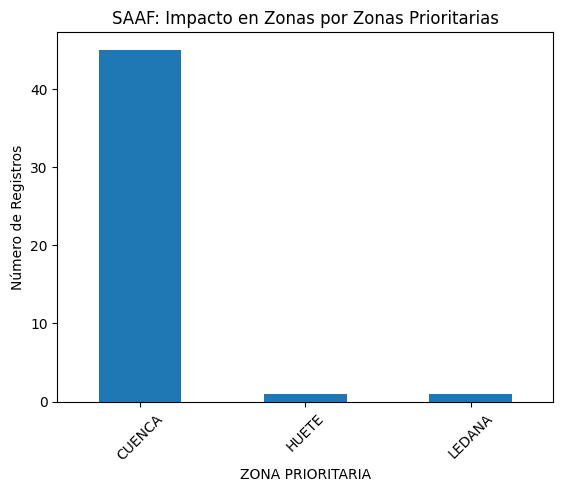

In [67]:
# Calcular el conteo de registros para cada categoría
cat_count = df_comun['LOCALIDAD'].value_counts()

# Crear un gráfico de barras
cat_count.sort_index().plot(kind='bar')

# Personalización adicional
plt.title('SAAF: Impacto en Zonas por Zonas Prioritarias')
plt.xlabel('ZONA PRIORITARIA')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor lectura
plt.show()

In [91]:
print("En este caso concreto las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son: \n\nLocalidad Nº Registros")
print(cat_count)
# DEFINIR QUÉ SE CONSIDERA IMPACTO FUERTE/IMPACTO NORMAL/IMPACTO LEVE
# Iterar sobre la serie y mostrar solo las localidades con un valor mayor que 10
for localidad, valor in cat_count.items():
    if valor > 10:
      print(f"La Localidad de {localidad} tiene un impacto fuerte, ya que cuenta con {valor} registros.")
    elif valor > 5:
      print(f"La Localidad de {localidad} tiene un impacto medio, ya que cuenta con {valor} registros.")
    else:
      if valor > 1:
        print(f"La Localidad de {localidad} tiene un impacto leve, ya que cuenta con {valor} registros.")
      else:
        print(f"La Localidad de {localidad} tiene un impacto leve, ya que cuenta con {valor} registro.")

En este caso concreto las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son: 

Localidad Nº Registros
CUENCA    45
HUETE      1
LEDANA     1
Name: LOCALIDAD, dtype: int64
La Localidad de CUENCA tiene un impacto fuerte, ya que cuenta con 45 registros.
La Localidad de HUETE tiene un impacto leve, ya que cuenta con 1 registro.
La Localidad de LEDANA tiene un impacto leve, ya que cuenta con 1 registro.
